# A quick spatial startup to explore geometry representations

Considering large computational resource requirements for whole data process, we provide simple analysis based on the processed data.

## environment setup

In [1]:
# !conda create --name geo-nav python=3.11
# !conda activate geo-nav
# !conda install matplotlib numpy scipy pandas
# !conda install opencv sklearn einops seaborn
# pip install voxelwise_tutorials 

In [2]:
# suppress warnings
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# The plotting tool we will be using in this course
import matplotlib.pyplot as plt

# Module essential for data organization and manipulation
import numpy as np #numpy's "nickname" is np
import copy
from scipy import stats
from einops import rearrange

# display the plots inline 
%matplotlib inline 
# autosave for every 5 secs
%autosave 5

num_runs = 14
num_TRs = 223
num_midlayer_units = 8
num_layer_pca_components = 20
num_deeplayers_units = num_midlayer_units + 12*num_layer_pca_components
num_semantic_categories = 10

start_fixation_TRs = 3
hemodynamic_shift_TRs = 3
num_TRs_video = 200
glm_show_alpha = False
num_road_types = 4

Autosaving every 5 seconds


## load design matrix and data

### load design matrix of depth

In [3]:
from scipy.io import loadmat

matdic = loadmat("processed_data/design_matrix_alltowns_vit_pca_deeplayers_12layer_20_1latent_8.mat")

depth_design_matrix_alltowns = matdic["design_matrix_alltowns"]
print("design matrix for all towns (n_TRs, n_latent_units) =", depth_design_matrix_alltowns.shape)

if(np.isnan(depth_design_matrix_alltowns).any()):
    print("depth_design_matrix_alltowns contain NaN values")
    
## may not add zscore
depth_design_matrix_alltowns = stats.zscore(depth_design_matrix_alltowns, axis=0)

if(np.isnan(depth_design_matrix_alltowns).any()):
    print("depth_design_matrix_alltowns contain NaN values")

design matrix for all towns (n_TRs, n_latent_units) = (1784, 269)


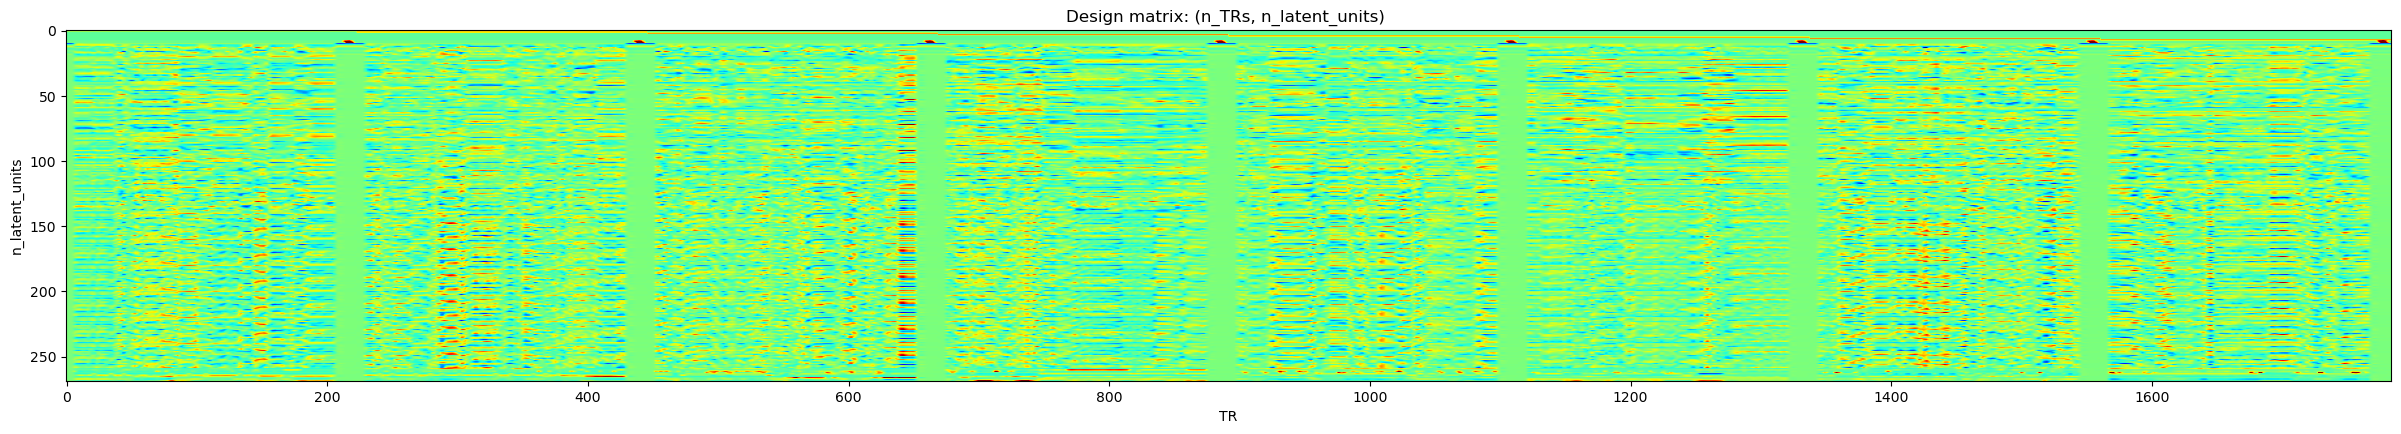

In [4]:
plt.figure(figsize=(30, 20))
plt.title('Design matrix: (n_TRs, n_latent_units) ')
plt.xlabel('TR')
plt.ylabel('n_latent_units')
plt.imshow(depth_design_matrix_alltowns.T, cmap='jet', vmin=-5, vmax=5)
# plt.colorbar()

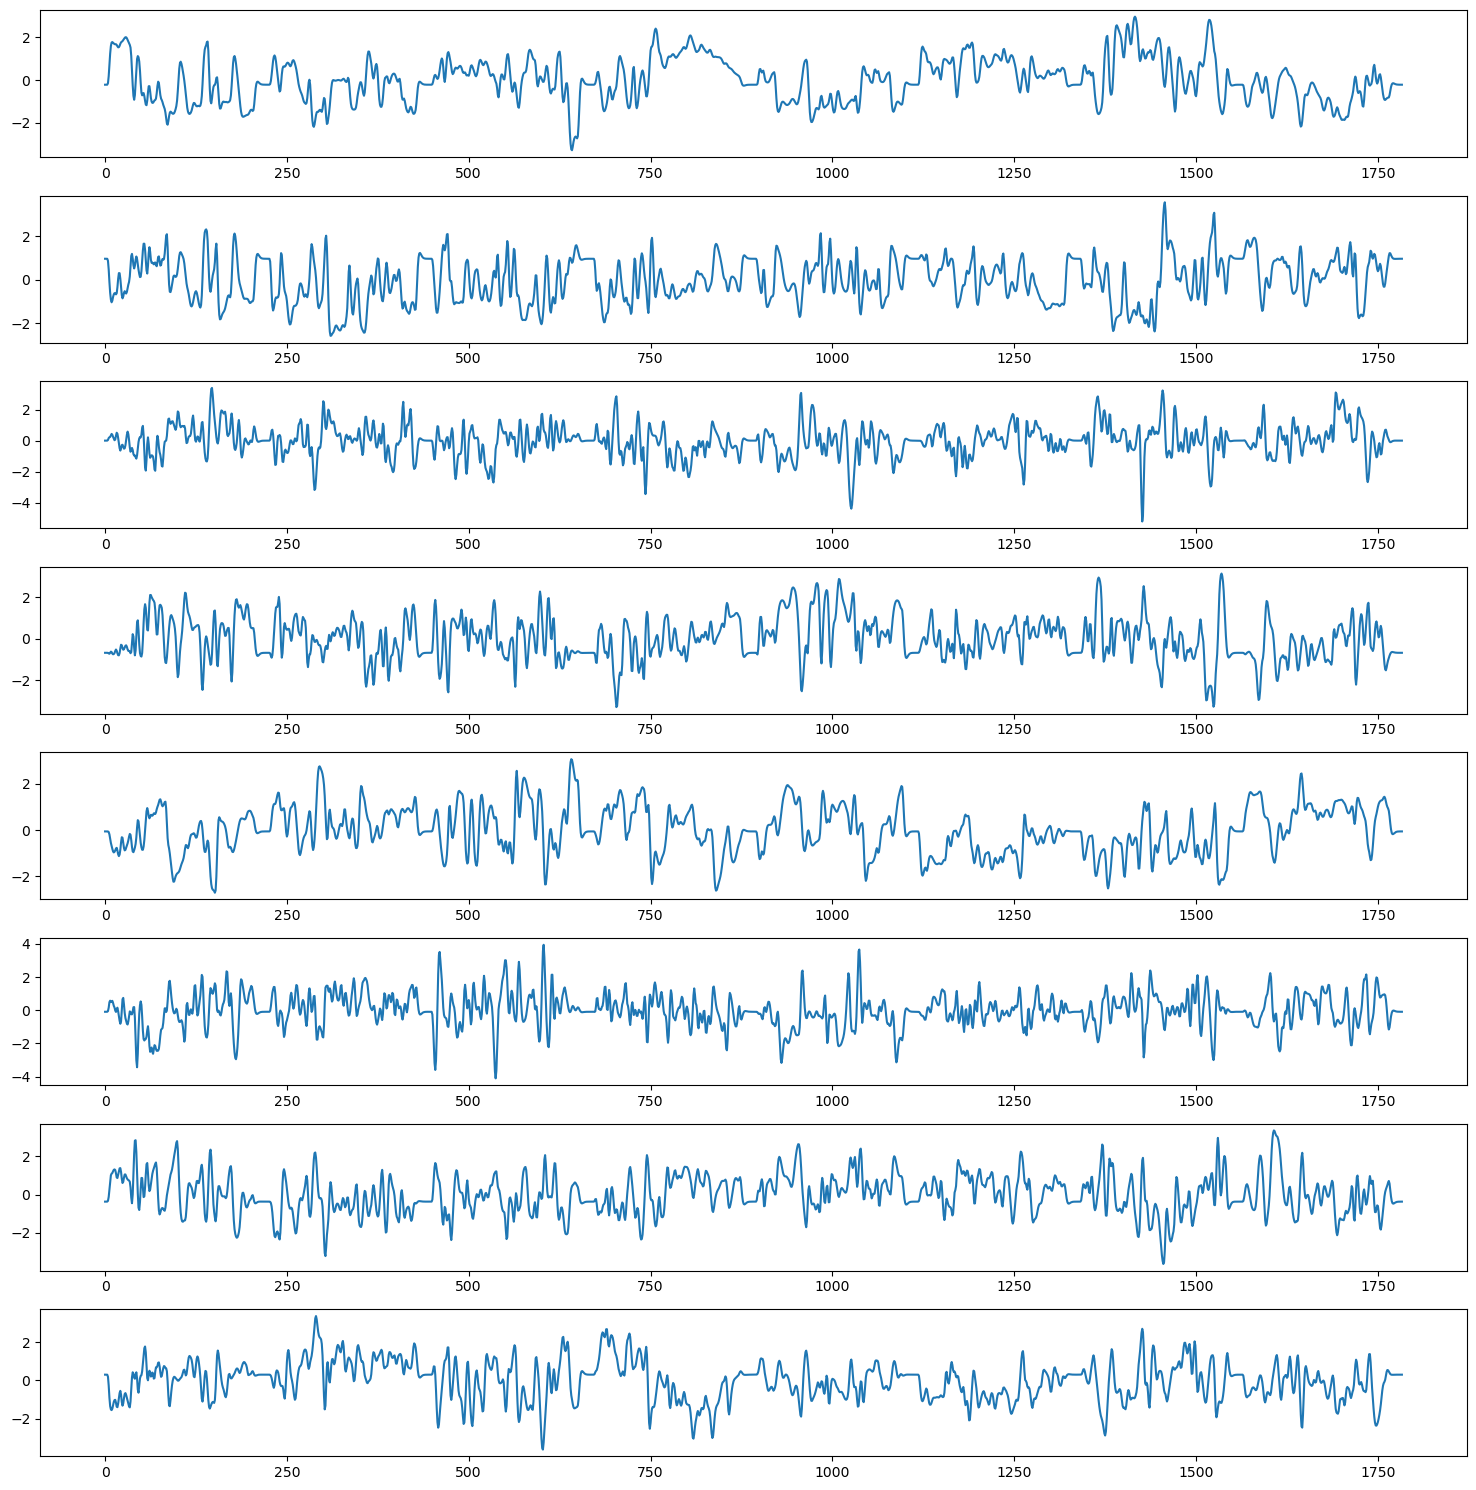

In [5]:
# check midlayer units
temp_data_ = depth_design_matrix_alltowns[:,-(num_deeplayers_units+num_semantic_categories):]
temp_data = temp_data_[:,0:num_midlayer_units]

n = temp_data.shape[1]
fig, axs = plt.subplots(n, 1,figsize=(15,15))
for i in range(n):
    tmp = temp_data[:,i]
    axs[i].plot(np.arange(len(tmp)), tmp)
    # axs[i].xaxis.set_ticks(np.arange(0, 200, 25) * 1.5)

fig.tight_layout()
plt.show()

### load design matrix of roadtypes

In [6]:
from scipy.io import loadmat

matdic = loadmat("processed_data/design_matrix_alltowns_roadtypes.mat")

roadtypes_design_matrix_alltowns = matdic["design_matrix_alltowns"]
print("design matrix for all towns (n_TRs, n_road_types) =", roadtypes_design_matrix_alltowns.shape)

if(np.isnan(roadtypes_design_matrix_alltowns).any()):
    print("roadtypes_design_matrix_alltowns contain NaN values")
    
## may not add zscore
# design_matrix_alltowns = stats.zscore(roadtypes_design_matrix_alltowns, axis=0)

if(np.isnan(roadtypes_design_matrix_alltowns).any()):
    print("roadtypes_design_matrix_alltowns contain NaN values")

design matrix for all towns (n_TRs, n_road_types) = (1784, 15)


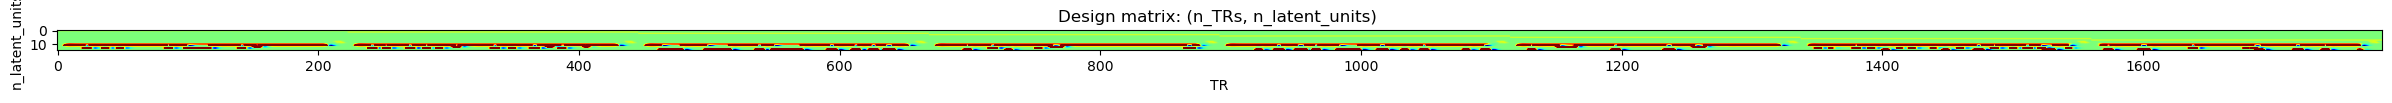

In [7]:
plt.figure(figsize=(30, 20))
plt.title('Design matrix: (n_TRs, n_latent_units) ')
plt.xlabel('TR')
plt.ylabel('n_latent_units')
plt.imshow(roadtypes_design_matrix_alltowns.T, cmap='jet', vmin=-5, vmax=5)
# plt.colorbar()

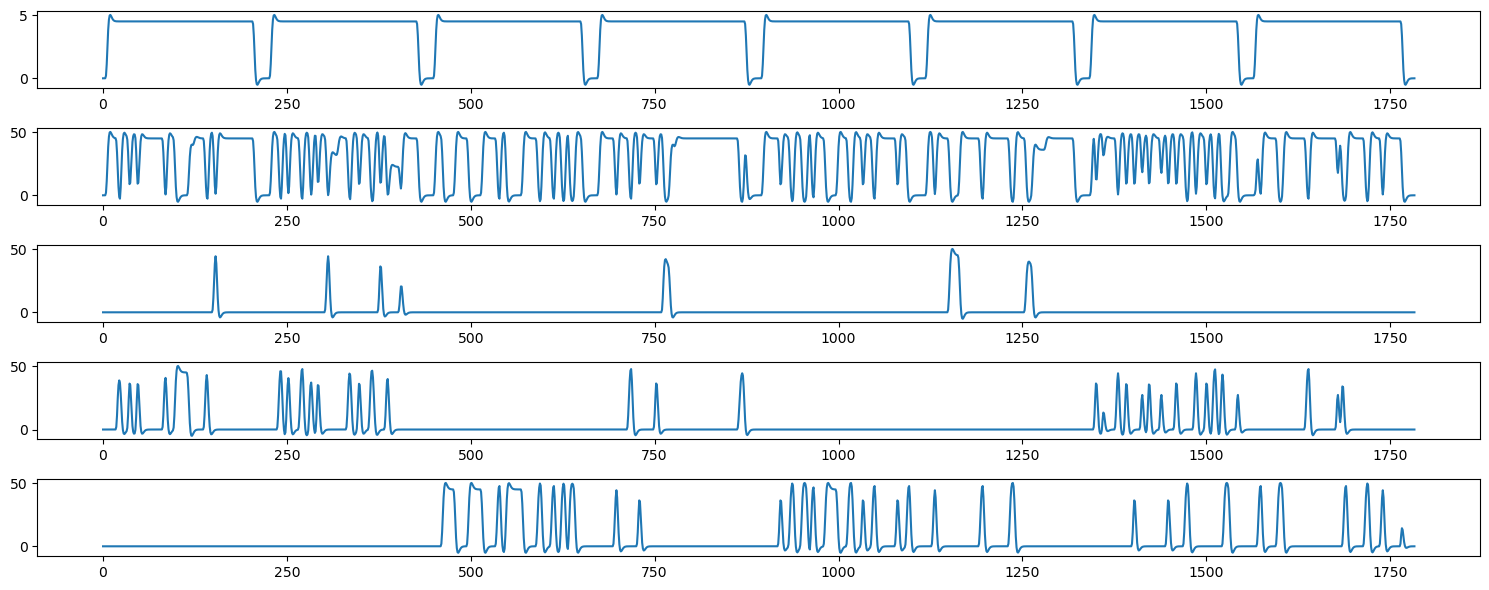

In [8]:
# check midlayer units
temp_data_ = roadtypes_design_matrix_alltowns[:,-5:]
temp_data = temp_data_[:,:]

n = temp_data.shape[1]
fig, axs = plt.subplots(n, 1,figsize=(15,6))
for i in range(n):
    tmp = temp_data[:,i]
    axs[i].plot(np.arange(len(tmp)), tmp)
    # axs[i].xaxis.set_ticks(np.arange(0, 200, 25) * 1.5)

fig.tight_layout()
plt.show()

### load shared response

In [9]:
# shared response with SRM feature dimensions determined by number of voxels in each region
from scipy.io import loadmat

matdic = loadmat("processed_data/vit_1409_dims_semgeo_shared_glm_list_optimal_hard_threshold.mat")

semgeo_shared_glm_list = matdic["semgeo_shared_glm_list"]
semgeo_shared_glm_list = semgeo_shared_glm_list[0]
print("shared response (shared_features, n_TRs) =", semgeo_shared_glm_list[0].shape)

shared response (shared_features, n_TRs) = (35, 3122)


In [10]:
# zscore shared response - non-effective
from scipy import stats

for i_brain_region in range(len(semgeo_shared_glm_list)):
  semgeo_shared_glm_list[i_brain_region] = stats.zscore(semgeo_shared_glm_list[i_brain_region], axis=1)

  if(np.isnan(semgeo_shared_glm_list[i_brain_region]).any()):
      print("semgeo_shared_glm_list[i_brain_region] contain NaN values")

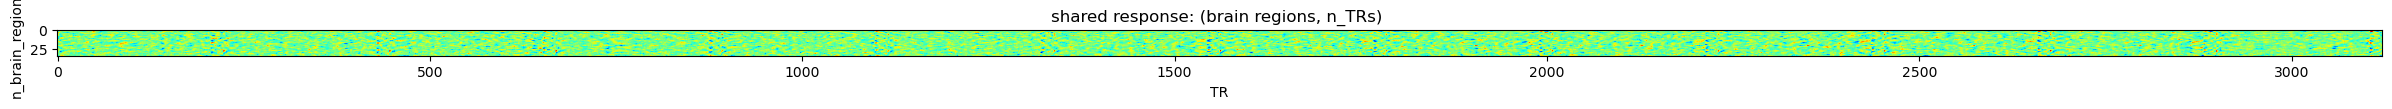

In [11]:
plt.figure(figsize=(30, 20))
plt.title('shared response: (brain regions, n_TRs) ')
plt.xlabel('TR')
plt.ylabel('n_brain_regions')
plt.imshow(semgeo_shared_glm_list[0], cmap='jet', vmin=-5, vmax=5)
# plt.colorbar()

### load region voxel array

In [12]:
from scipy.io import loadmat

matdic = loadmat("processed_data/vit_1409_dims_region_voxels_array.mat")

region_voxels_array = np.squeeze(matdic["region_voxels_array"])
print("region_voxels_array shape =", region_voxels_array.shape)

srm_dim_max = np.max(region_voxels_array)
srm_dim_min = np.min(region_voxels_array)
print("max:", srm_dim_max, ",min", srm_dim_min)

region_voxels_array shape = (180,)
max: 36 ,min 1


### load atlas brain regions

In [13]:
import os
# read design matrix
atlas_labels_txt = "Atlas MNI_Glasser_HCP_v1.0, 360 regions.txt"
atlas_labels_file = os.path.join("mni_glasser_hcp", atlas_labels_txt)

in_file = open(atlas_labels_file,'r')
brain_region_dict={}

# distinguish left and right brain regions
atlas_all_lines = in_file.readlines()

for i_line in range(0,len(atlas_all_lines)):
    if "u:L_" in atlas_all_lines[i_line]:
        
        atlas_brain_region_label = []

        # left brain regions
        atlas_line_left = atlas_all_lines[i_line]
        atlas_temp = atlas_line_left.split(":")
        atlas_brain_region_name = atlas_temp[1][2:]
        # print(atlas_brain_region_name)
        atlas_brain_region_label_left = int(atlas_temp[2][:-1])
        atlas_brain_region_label.append(atlas_brain_region_label_left)
        
        # right brain regions
        atlas_line_right = atlas_all_lines[i_line+1]
        atlas_temp = atlas_line_right.split(":")
        atlas_brain_region_name = atlas_temp[1][2:]
        atlas_brain_region_label_right = int(atlas_temp[2][:-1])
        atlas_brain_region_label.append(atlas_brain_region_label_right)

        # put into dict
        brain_region_dict[atlas_brain_region_name] = atlas_brain_region_label

# print(len(brain_region_dict),brain_region_dict)


In [14]:
brain_region_name_list = list(brain_region_dict.keys())
brain_region_label_list = list(brain_region_dict.values())

folder_list = ["sub-01", "sub-02", "sub-03", "sub-04", "sub-05", 
               "sub-06", "sub-07", "sub-08", "sub-09", "sub-10", 
               "sub-11", "sub-12", "sub-13", "sub-14", "sub-15",
               "sub-16", "sub-17", "sub-18", "sub-19", "sub-20",
               ]

num_subs = len(folder_list)

## train the geometry model


### split training and testing data

In [15]:
# take only one run for one town
num_run = 14
num_towns = 8

Y_train_list = []
Y_test_list = []

# take one run as test
for i_test_run in np.arange(num_towns):

  # spliting into train and test data
  Y_train_regions_list = []
  Y_test_regions_list = []
  Y_train_regions_array = np.empty((1400,0), float)
  Y_test_regions_array = np.empty((200,0), float)

  for i_region in range(0, len(semgeo_shared_glm_list)):

    temp_shared_response = semgeo_shared_glm_list[i_region]

    Y_data_temp = rearrange(temp_shared_response, 'i (j k) -> i j k', j=num_run)

    Y_data_array = np.concatenate((Y_data_temp[:,0:7,start_fixation_TRs+hemodynamic_shift_TRs:start_fixation_TRs+hemodynamic_shift_TRs+num_TRs_video], 
              Y_data_temp[:,num_run-1:num_run,start_fixation_TRs+hemodynamic_shift_TRs:start_fixation_TRs+hemodynamic_shift_TRs+num_TRs_video]), axis=1)

    Y_train = Y_data_array[:,np.arange(num_towns)!=i_test_run,:]
    Y_test = Y_data_array[:,np.arange(num_towns)==i_test_run,:]

    Y_train = rearrange(Y_train, 'i j k -> i (j k) ')
    Y_test = rearrange(Y_test, 'i j k -> i (j k) ')

    Y_train = Y_train.T
    Y_test = Y_test.T

    Y_train_regions_array = np.append(Y_train_regions_array, Y_train, axis=1)
    Y_test_regions_array = np.append(Y_test_regions_array, Y_test, axis=1)

  Y_train_list.append(Y_train_regions_array)
  Y_test_list.append(Y_test_regions_array)

print("Y_train (n_TRs, shared_features) =", Y_train.shape)
print("Y_test (n_TRs, shared_features) =", Y_test.shape)

print("Y_train_regions_array (n_TRs, n_regions*shared_features) =", Y_train_regions_array.shape)
print("Y_test_regions_array (n_TRs, n_regions*shared_features) =", Y_test_regions_array.shape)

if(np.isnan(Y_train_regions_array).any()):
    print("Y_test_regions_array contain NaN values")

if(np.isnan(Y_test_regions_array).any()):
    print("Y_test_regions_array contain NaN values")

Y_train (n_TRs, shared_features) = (1400, 6)
Y_test (n_TRs, shared_features) = (200, 6)
Y_train_regions_array (n_TRs, n_regions*shared_features) = (1400, 1409)
Y_test_regions_array (n_TRs, n_regions*shared_features) = (200, 1409)


In [16]:
X_data_temp = []
for i_run in np.arange(num_towns):
    data_temp = depth_design_matrix_alltowns[223*i_run:223*(i_run+1),-(num_deeplayers_units+num_semantic_categories):] # first 8, last num_semantic_categories
    data_temp = data_temp[start_fixation_TRs+hemodynamic_shift_TRs:start_fixation_TRs+hemodynamic_shift_TRs+num_TRs_video, 0:num_midlayer_units]
    X_data_temp.append(data_temp)

X_data_temp = np.asarray(X_data_temp)

X_train_list = []
X_test_list = []

for i_test_run in np.arange(num_towns):

    X_train = X_data_temp[np.arange(num_towns)!=i_test_run,:,:]
    X_test = X_data_temp[np.arange(num_towns)==i_test_run,:,:]

    X_train = rearrange(X_train, 'i j k -> (i j) k')
    X_test = rearrange(X_test, 'i j k -> (i j) k')

    X_train_list.append(X_train)
    X_test_list.append(X_test)

    if(np.isnan(X_train).any()):
        print("X_train contain NaN values")

    if(np.isnan(X_test).any()):
        print("X_test contain NaN values")

print("X_train (n_TRs, n_latent_units) =", X_train.shape)
print("X_test (n_TRs, n_latent_units) =", X_test.shape)


X_train (n_TRs, n_latent_units) = (1400, 8)
X_test (n_TRs, n_latent_units) = (200, 8)


### fit the model

In [17]:
score_subs_list = []
Y_test_orig_list = []
Y_test_pred_list = []
model_kernel_ridgecv_list = []

for i_test_run in np.arange(num_towns):

    print("i_run:",i_test_run)
    
    # get X data
    X_train = X_train_list[i_test_run]
    X_test = X_test_list[i_test_run]

    # get Y data
    Y_train = Y_train_list[i_test_run]
    Y_test = Y_test_list[i_test_run]

    # import
    from sklearn.model_selection import check_cv
    from voxelwise_tutorials.utils import generate_leave_one_run_out

    # indice of first sample of each run
    run_onsets = []
    num_run_train=7
    for i in range(num_run_train):
        run_onsets.append(i*num_TRs_video)
    # print(run_onsets)

    n_samples_train = X_train.shape[0]
    cv = generate_leave_one_run_out(n_samples_train, run_onsets)
    cv = check_cv(cv)  # copy the cross-validation splitter into a reusable list

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(with_mean=False, with_std=False)

    from voxelwise_tutorials.delayer import Delayer
    delayer = Delayer(delays=[0])

    from himalaya.kernel_ridge import KernelRidgeCV
    from himalaya.ridge import RidgeCV
    from himalaya.backend import set_backend
    backend = set_backend("torch_cuda", on_error="warn")
    # print(backend)

    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")

    alphas = np.logspace(0, 20, 120)
    kernel_ridge_cv = RidgeCV(
        alphas=alphas, cv=cv, fit_intercept=True,
        solver_params=None) # try None

    from sklearn.pipeline import make_pipeline
    pipeline = make_pipeline(
        scaler,
        delayer,
        kernel_ridge_cv,
    )
    from sklearn import set_config
    set_config(display='diagram')  # requires scikit-learn 0.23
    _ = pipeline.fit(X_train, Y_train)

    # test
    scores = pipeline.score(X_test, Y_test)
    scores = backend.to_numpy(scores)
    score_subs_list.append(scores)

    # predict
    Y_test_predicted = pipeline.predict(X_test)
    Y_test_orig_list.append(Y_test)
    Y_test_pred_list.append(Y_test_predicted)

    # append ridgecv
    model_kernel_ridgecv_list.append(pipeline)

    # plot best alphas
    if glm_show_alpha == True:
        from himalaya.viz import plot_alphas_diagnostic
        import matplotlib.pyplot as plt
        best_alphas = backend.to_numpy(pipeline[-1].best_alphas_)
        print('best_alphas:',best_alphas.shape)
        plot_alphas_diagnostic(best_alphas=best_alphas, alphas=alphas)
        plt.show()

score_subs_array = np.array(score_subs_list)
print("score_subs_array.shape:",score_subs_array.shape)

Y_test_orig_midlayer_geometry = np.asarray(Y_test_orig_list)
print("Y_test_orig_midlayer_geometry.shape:",Y_test_orig_midlayer_geometry.shape)

Y_test_pred_midlayer_geometry = np.asarray(Y_test_pred_list)
print("Y_test_pred_midlayer_geometry.shape:",Y_test_pred_midlayer_geometry.shape)

i_run: 0
i_run: 1
i_run: 2
i_run: 3
i_run: 4
i_run: 5
i_run: 6
i_run: 7
score_subs_array.shape: (8, 1409)
Y_test_orig_midlayer_geometry.shape: (8, 200, 1409)
Y_test_pred_midlayer_geometry.shape: (8, 200, 1409)


### visualize the results

#### explainable variance of each town

score shape: (8, 1409)


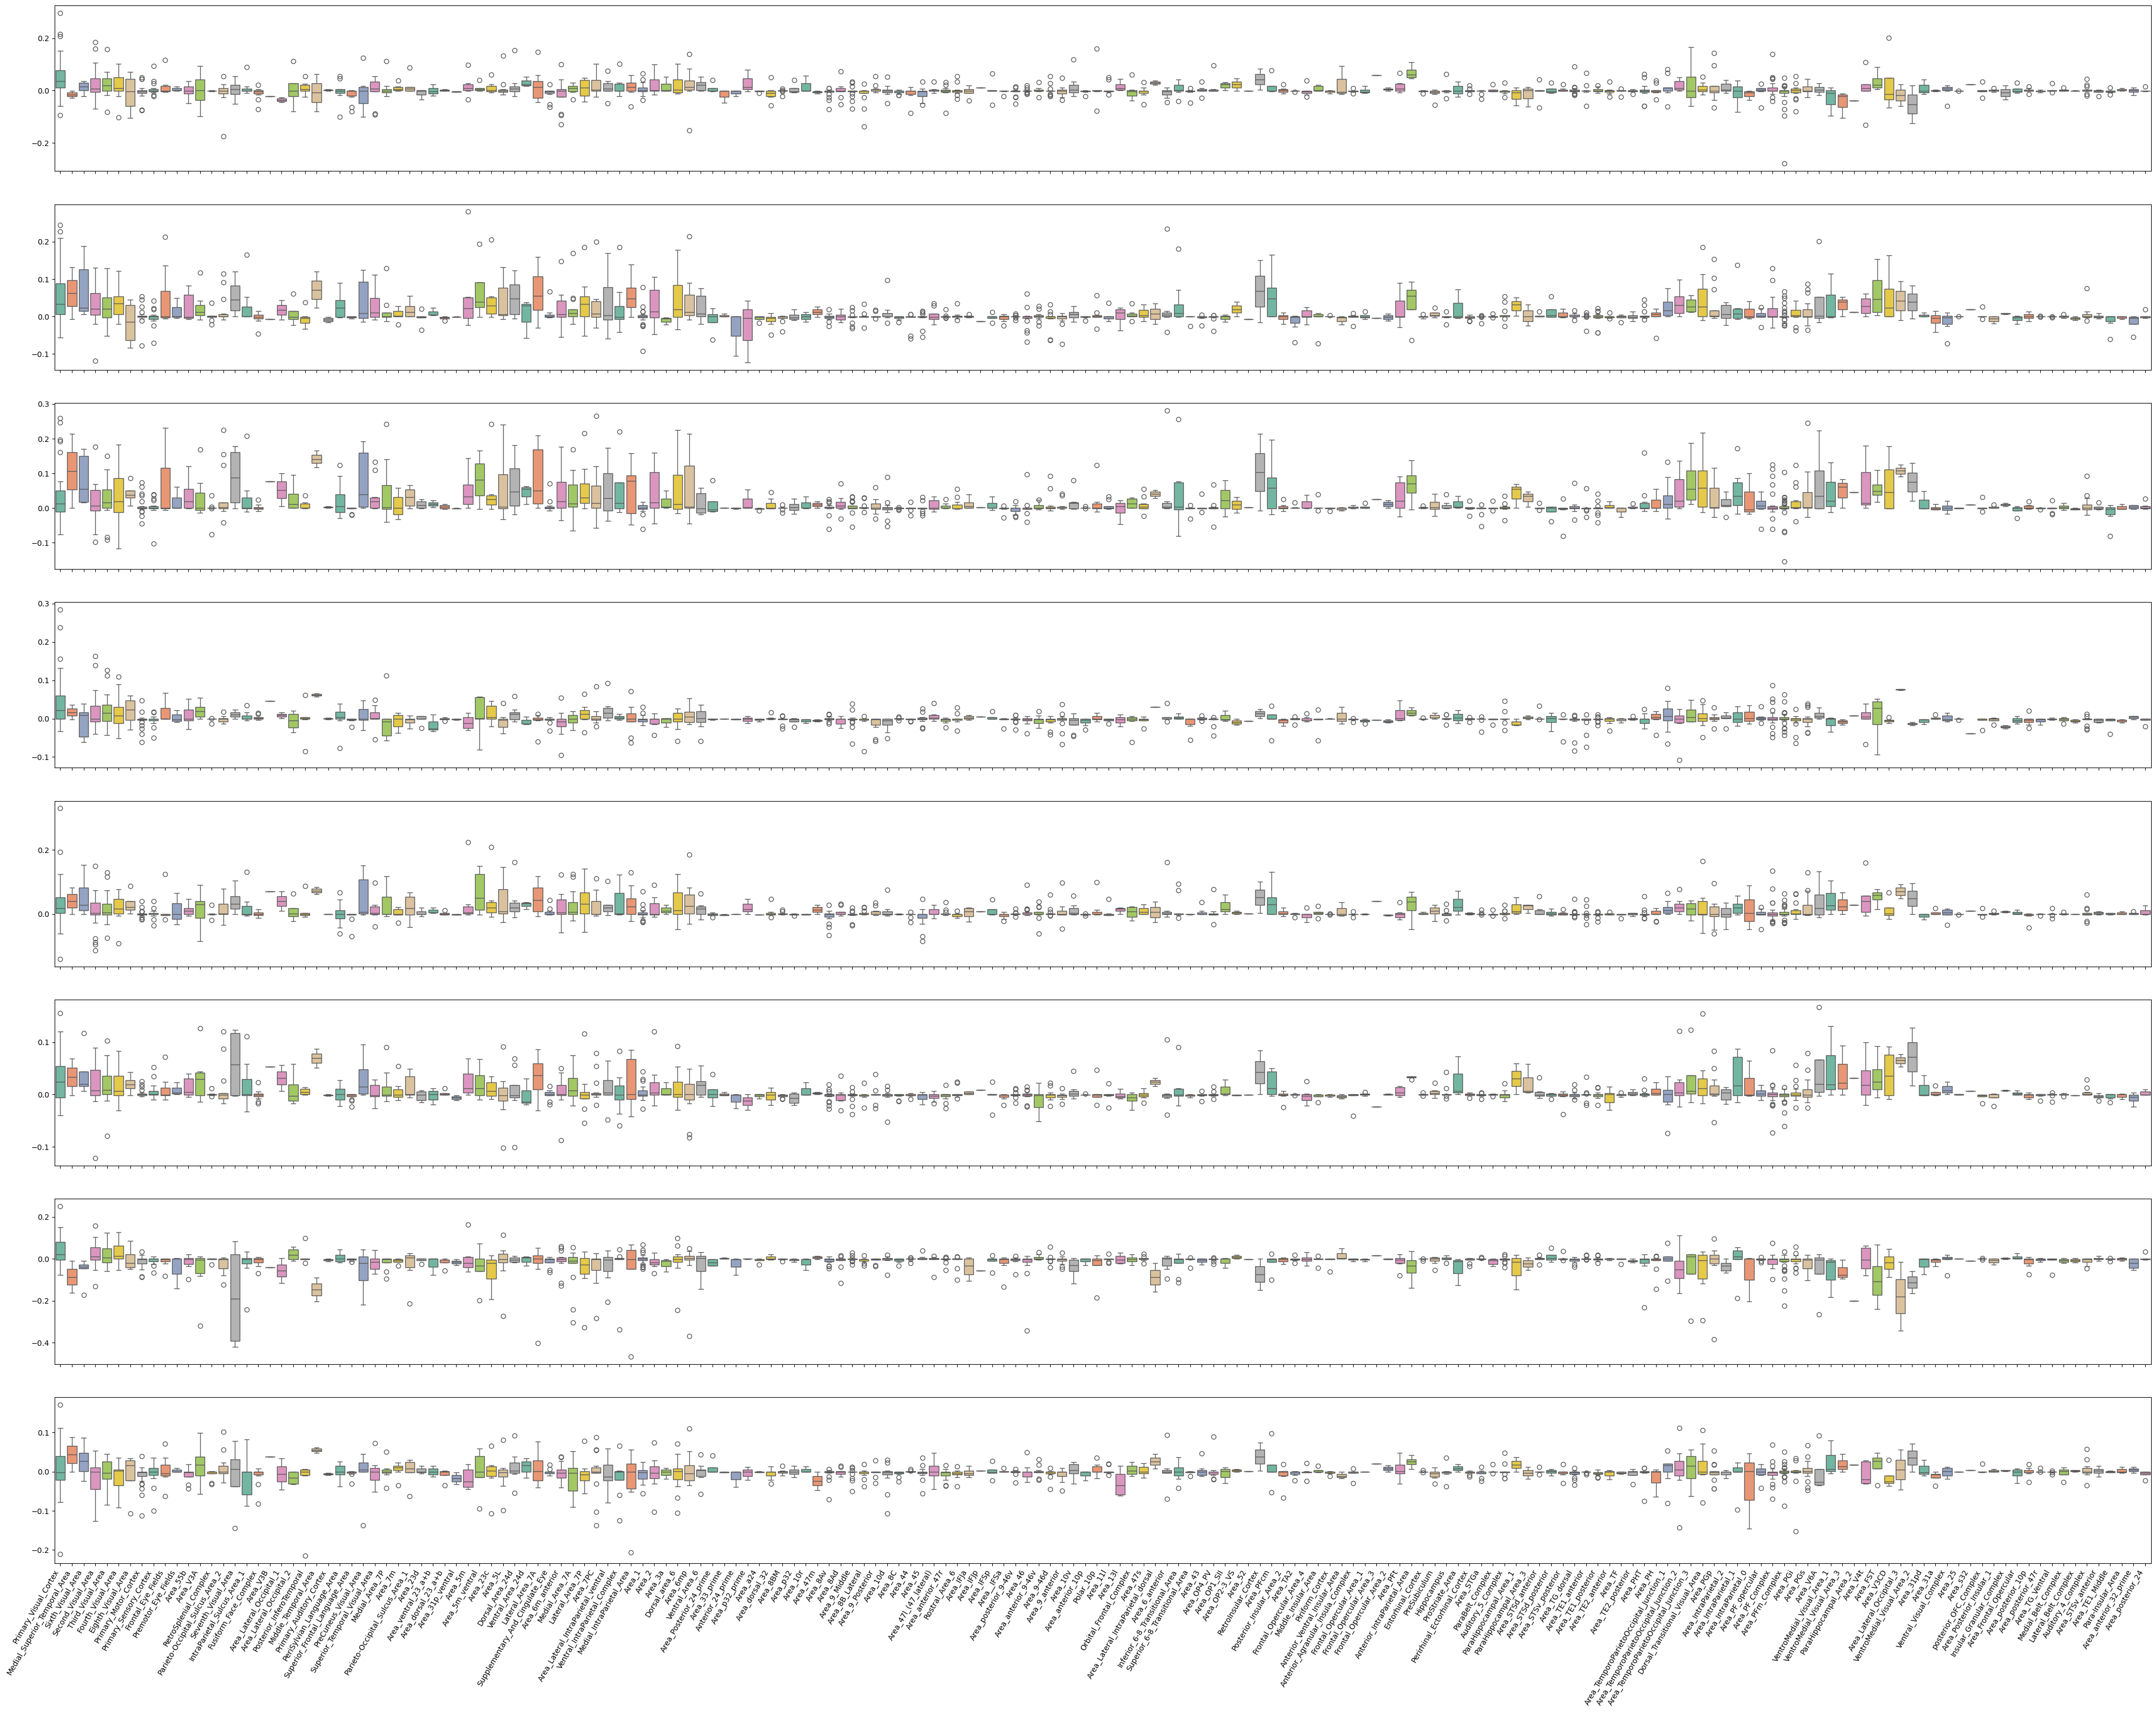

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

temp_plot_score_regions_array = copy.deepcopy(score_subs_array)
print('score shape:',temp_plot_score_regions_array.shape)

fig, axes = plt.subplots(nrows=temp_plot_score_regions_array.shape[0], ncols=1, figsize=(50, 60))
# fig.suptitle("Scores on test data", fontsize=18)
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2
# plt.xlabel('Brain regions', fontsize=24)
# plt.ylabel('Scores', fontsize=16)

for i, ax in zip(range(temp_plot_score_regions_array.shape[0]), axes.flat):
    temp_plot_score_regions_list = []
    dim_accumulation = 0
    for i_region in range(0, len(brain_region_name_list)):
        dim_features = region_voxels_array[i_region]
        current_region_scores = temp_plot_score_regions_array[i, dim_accumulation:dim_accumulation + dim_features]
        dim_accumulation = dim_accumulation + dim_features
        # current_region_scores[current_region_scores < -0.05] = -0.05
        temp_plot_score_regions_list.append(current_region_scores)
        
    boxplt = sns.boxplot(data=temp_plot_score_regions_list, palette="Set2", ax=ax)
    boxplt.set_xticklabels([])
ax.set_xticklabels(brain_region_name_list)
plt.xticks(rotation=60, ha='right')
plt.subplots_adjust(bottom=0.4)
plt.show()

# fig.savefig('img/'+'semgeo_whole_brain_regions_test_glm_score.png', format='png', dpi=500)

#### explainable variance of each dim

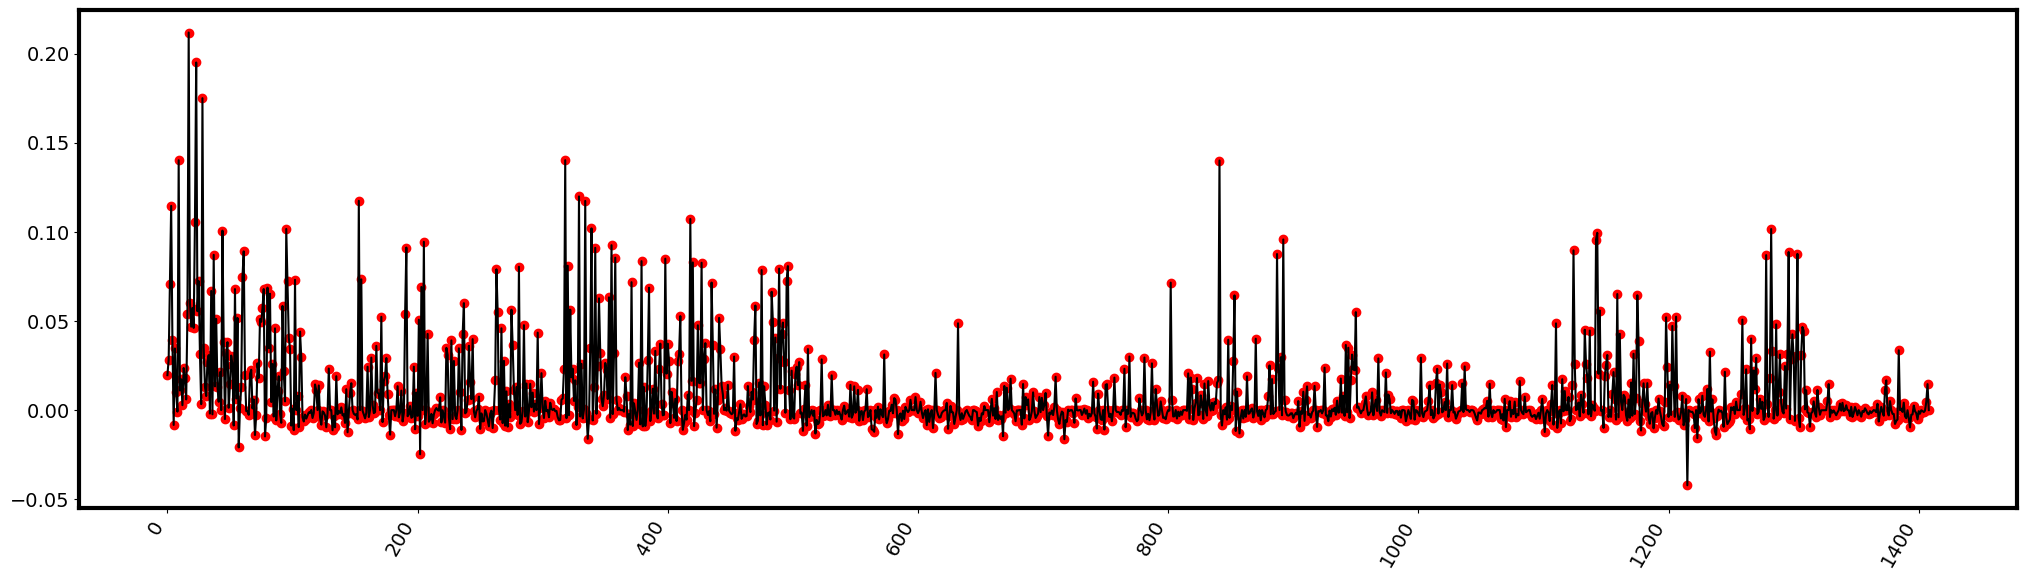

In [19]:
from sklearn.metrics import r2_score

# ve for each brain regions
dim_accumulation = 0
sub_score = np.zeros((Y_test_pred_midlayer_geometry.shape[2],), dtype=float)

for i_dim in range(0, Y_test_pred_midlayer_geometry.shape[2]):

    error = 0
    var = 0
    for i_test_run in np.arange(num_towns):

        Y_test = Y_test_orig_list[i_test_run]
        Y_test_predicted = Y_test_pred_list[i_test_run]

        y_true = Y_test[:, i_dim:i_dim + 1]
        y_pred = Y_test_predicted[:, i_dim:i_dim + 1]
        
        # error = error + ((y_true - y_pred) ** 2.0).sum()
        # var = var + ((y_true - y_true.mean(0)) ** 2.0).sum()

        error = error + (np.var(y_true - y_pred) ).sum()
        var = var + (np.var(y_true - y_true.mean(0)) ).sum()


    # dim_accumulation = dim_accumulation + dim_features

    sub_score[i_dim] = 1.0 - error / var
    
# show summary ev runs
explained_variance_single_dim_midlayer_geometry = copy.deepcopy(np.asarray(sub_score))

plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 3
fig = plt.figure(figsize =(25, 6))
plt.plot(np.arange(0,Y_test_pred_midlayer_geometry.shape[2]), explained_variance_single_dim_midlayer_geometry,'ro')
plt.plot(np.arange(0,Y_test_pred_midlayer_geometry.shape[2]), explained_variance_single_dim_midlayer_geometry,'k-')
# plt.xticks(np.arange(0,len(brain_region_name_list)), brain_region_name_list, rotation='vertical', fontsize=8)
plt.xticks(rotation=60, ha='right')
# plt.margins(0.01)
plt.subplots_adjust(bottom=0.05)
plt.show()
# fig.savefig('img/'+'shared_ae-whole_brain_regions_glm_score.eps', format='eps', dpi=900)
# fig.savefig('img/'+'semgeo_shared_ae-whole_brain_regions_glm_score.png', dpi=500)


#### explainable variance of each region

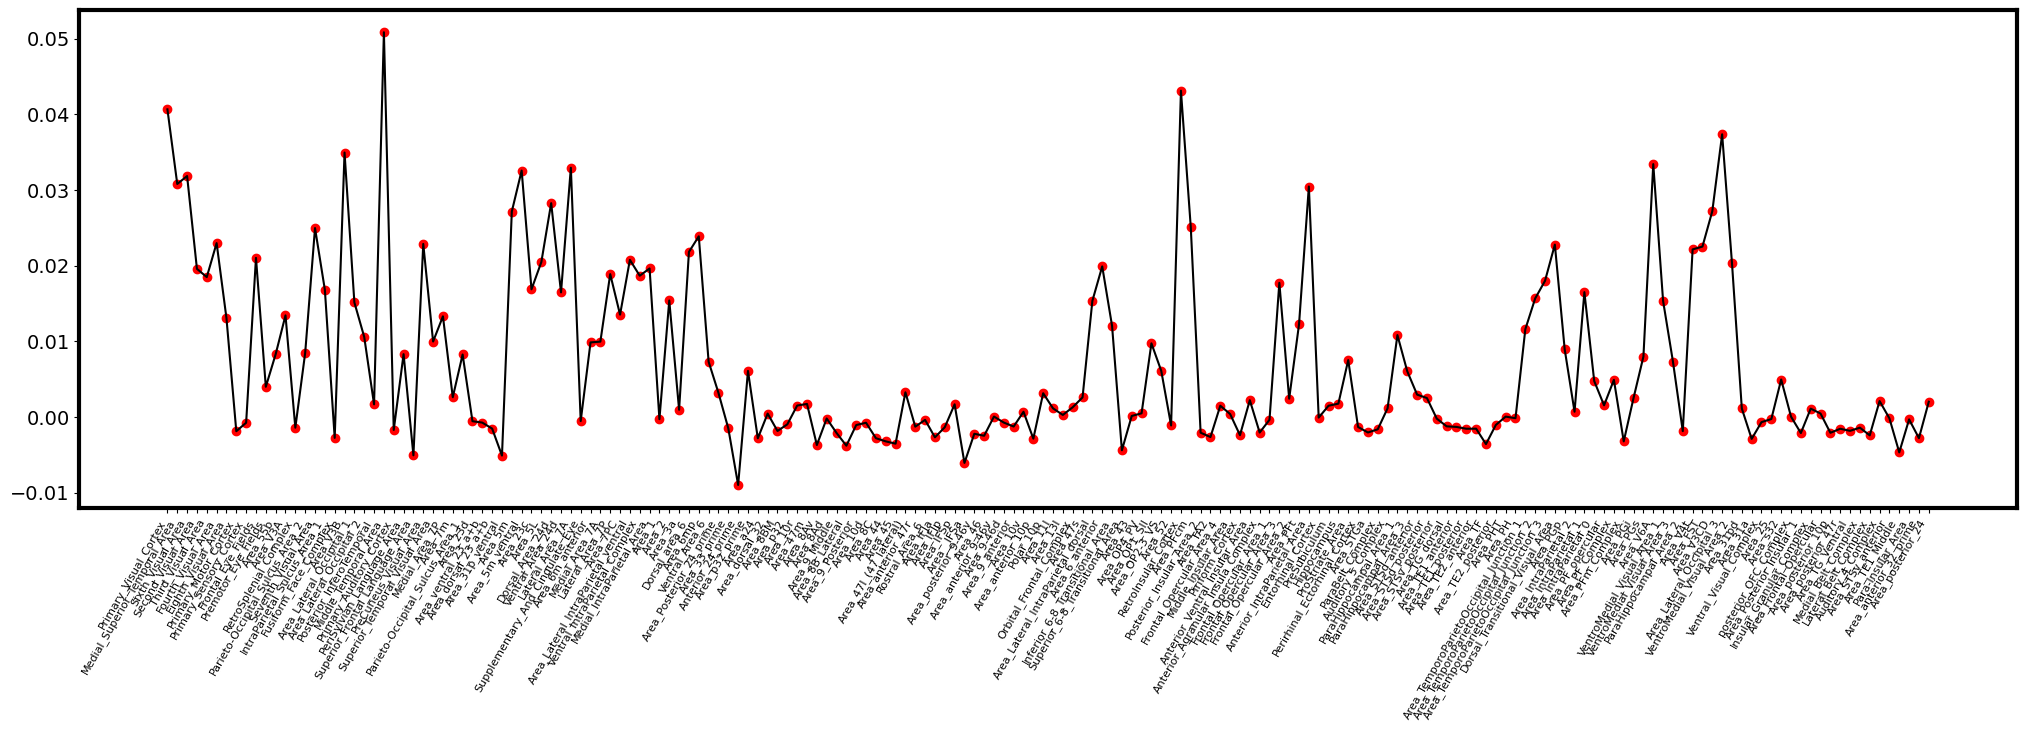

In [20]:
from sklearn.metrics import r2_score

# ve for each brain regions
dim_accumulation = 0
sub_score = np.zeros((len(brain_region_name_list),), dtype=float)

for i_region in range(0, len(brain_region_name_list)):
    dim_features = region_voxels_array[i_region]

    error = 0
    var = 0
    for i_test_run in np.arange(num_towns):

        Y_test = Y_test_orig_list[i_test_run]
        Y_test_predicted = Y_test_pred_list[i_test_run]

        y_true = Y_test[:, dim_accumulation:dim_accumulation + dim_features]
        y_pred = Y_test_predicted[:, dim_accumulation:dim_accumulation + dim_features]
        
        # error = error + ((y_true - y_pred) ** 2.0).sum()
        # var = var + ((y_true - y_true.mean(0)) ** 2.0).sum()

        error = error + (np.var(y_true - y_pred) ).sum()
        var = var + (np.var(y_true - y_true.mean(0)) ).sum()

    dim_accumulation = dim_accumulation + dim_features

    # each_sub_score[i_region] = r2_score(y_true, y_pred)
    # error = ((y_true - y_pred) ** 2.0).sum()
    # var = ((y_true - y_true.mean(0)) ** 2.0).sum()
    sub_score[i_region] = 1.0 - error / var
    
# show summary ev runs
explained_variance_midlayer_geometry = copy.deepcopy(np.asarray(sub_score))

plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 3
fig = plt.figure(figsize =(25, 6))
plt.plot(np.arange(0,len(brain_region_name_list)), explained_variance_midlayer_geometry,'ro')
plt.plot(np.arange(0,len(brain_region_name_list)), explained_variance_midlayer_geometry,'k-')
plt.xticks(np.arange(0,len(brain_region_name_list)), brain_region_name_list, rotation='vertical', fontsize=8)
plt.xticks(rotation=60, ha='right')
# plt.margins(0.01)
plt.subplots_adjust(bottom=0.05)
plt.show()
# fig.savefig('img/'+'shared_ae-whole_brain_regions_glm_score.eps', format='eps', dpi=900)
# fig.savefig('img/'+'semgeo_shared_ae-whole_brain_regions_glm_score.png', dpi=500)


## train the roadtypes model


### split training and testing data

In [21]:
# take only one run for one town
num_run = 14
num_towns = 8

Y_train_list = []
Y_test_list = []

# take one run as test
for i_test_run in np.arange(num_towns):

  # spliting into train and test data
  Y_train_regions_list = []
  Y_test_regions_list = []
  Y_train_regions_array = np.empty((1400,0), float)
  Y_test_regions_array = np.empty((200,0), float)

  for i_region in range(0, len(semgeo_shared_glm_list)):

    temp_shared_response = semgeo_shared_glm_list[i_region]

    Y_data_temp = rearrange(temp_shared_response, 'i (j k) -> i j k', j=num_run)

    Y_data_array = np.concatenate((Y_data_temp[:,0:7,start_fixation_TRs+hemodynamic_shift_TRs:start_fixation_TRs+hemodynamic_shift_TRs+num_TRs_video], 
              Y_data_temp[:,num_run-1:num_run,start_fixation_TRs+hemodynamic_shift_TRs:start_fixation_TRs+hemodynamic_shift_TRs+num_TRs_video]), axis=1)

    Y_train = Y_data_array[:,np.arange(num_towns)!=i_test_run,:]
    Y_test = Y_data_array[:,np.arange(num_towns)==i_test_run,:]

    Y_train = rearrange(Y_train, 'i j k -> i (j k) ')
    Y_test = rearrange(Y_test, 'i j k -> i (j k) ')

    Y_train = Y_train.T
    Y_test = Y_test.T

    Y_train_regions_array = np.append(Y_train_regions_array, Y_train, axis=1)
    Y_test_regions_array = np.append(Y_test_regions_array, Y_test, axis=1)

  Y_train_list.append(Y_train_regions_array)
  Y_test_list.append(Y_test_regions_array)

print("Y_train (n_TRs, shared_features) =", Y_train.shape)
print("Y_test (n_TRs, shared_features) =", Y_test.shape)

print("Y_train_regions_array (n_TRs, n_regions*shared_features) =", Y_train_regions_array.shape)
print("Y_test_regions_array (n_TRs, n_regions*shared_features) =", Y_test_regions_array.shape)

if(np.isnan(Y_train_regions_array).any()):
    print("Y_test_regions_array contain NaN values")

if(np.isnan(Y_test_regions_array).any()):
    print("Y_test_regions_array contain NaN values")

Y_train (n_TRs, shared_features) = (1400, 6)
Y_test (n_TRs, shared_features) = (200, 6)
Y_train_regions_array (n_TRs, n_regions*shared_features) = (1400, 1409)
Y_test_regions_array (n_TRs, n_regions*shared_features) = (200, 1409)


In [22]:
X_data_temp = []
for i_run in np.arange(num_towns):
    data_temp = roadtypes_design_matrix_alltowns[223*i_run:223*(i_run+1),-(num_road_types):] # first 8, last num_semantic_categories
    data_temp = data_temp[start_fixation_TRs+hemodynamic_shift_TRs:start_fixation_TRs+hemodynamic_shift_TRs+num_TRs_video, 0:num_road_types]
    X_data_temp.append(data_temp)

X_data_temp = np.asarray(X_data_temp)

X_train_list = []
X_test_list = []

for i_test_run in np.arange(num_towns):

    X_train = X_data_temp[np.arange(num_towns)!=i_test_run,:,:]
    X_test = X_data_temp[np.arange(num_towns)==i_test_run,:,:]

    X_train = rearrange(X_train, 'i j k -> (i j) k')
    X_test = rearrange(X_test, 'i j k -> (i j) k')

    X_train_list.append(X_train)
    X_test_list.append(X_test)

    if(np.isnan(X_train).any()):
        print("X_train contain NaN values")

    if(np.isnan(X_test).any()):
        print("X_test contain NaN values")

print("X_train (n_TRs, n_latent_units) =", X_train.shape)
print("X_test (n_TRs, n_latent_units) =", X_test.shape)


X_train (n_TRs, n_latent_units) = (1400, 4)
X_test (n_TRs, n_latent_units) = (200, 4)


### fit the model

In [23]:
score_subs_list = []
Y_test_orig_list = []
Y_test_pred_list = []
model_kernel_ridgecv_list = []

for i_test_run in np.arange(num_towns):

    print("i_run:",i_test_run)
    
    # get X data
    X_train = X_train_list[i_test_run]
    X_test = X_test_list[i_test_run]

    # get Y data
    Y_train = Y_train_list[i_test_run]
    Y_test = Y_test_list[i_test_run]

    # import
    from sklearn.model_selection import check_cv
    from voxelwise_tutorials.utils import generate_leave_one_run_out

    # indice of first sample of each run
    run_onsets = []
    num_run_train=7
    for i in range(num_run_train):
        run_onsets.append(i*num_TRs_video)
    # print(run_onsets)

    n_samples_train = X_train.shape[0]
    cv = generate_leave_one_run_out(n_samples_train, run_onsets)
    cv = check_cv(cv)  # copy the cross-validation splitter into a reusable list

    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler(with_mean=False, with_std=False)

    from voxelwise_tutorials.delayer import Delayer
    delayer = Delayer(delays=[0])

    from himalaya.kernel_ridge import KernelRidgeCV
    from himalaya.ridge import RidgeCV
    from himalaya.backend import set_backend
    backend = set_backend("torch_cuda", on_error="warn")
    # print(backend)

    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")

    alphas = np.logspace(0, 20, 120)
    kernel_ridge_cv = RidgeCV(
        alphas=alphas, cv=cv, fit_intercept=True,
        solver_params=None) # try None

    from sklearn.pipeline import make_pipeline
    pipeline = make_pipeline(
        scaler,
        delayer,
        kernel_ridge_cv,
    )
    from sklearn import set_config
    set_config(display='diagram')  # requires scikit-learn 0.23
    _ = pipeline.fit(X_train, Y_train)

    # test
    scores = pipeline.score(X_test, Y_test)
    scores = backend.to_numpy(scores)
    score_subs_list.append(scores)

    # predict
    Y_test_predicted = pipeline.predict(X_test)
    Y_test_orig_list.append(Y_test)
    Y_test_pred_list.append(Y_test_predicted)

    # append ridgecv
    model_kernel_ridgecv_list.append(pipeline)

    # plot best alphas
    if glm_show_alpha == True:
        from himalaya.viz import plot_alphas_diagnostic
        import matplotlib.pyplot as plt
        best_alphas = backend.to_numpy(pipeline[-1].best_alphas_)
        print('best_alphas:',best_alphas.shape)
        plot_alphas_diagnostic(best_alphas=best_alphas, alphas=alphas)
        plt.show()

score_subs_array = np.array(score_subs_list)
print("score_subs_array.shape:",score_subs_array.shape)

Y_test_orig_roadtypes = np.asarray(Y_test_orig_list)
print("Y_test_orig_roadtypes.shape:",Y_test_orig_roadtypes.shape)

Y_test_pred_roadtypes = np.asarray(Y_test_pred_list)
print("Y_test_pred_roadtypes.shape:",Y_test_pred_roadtypes.shape)


i_run: 0
i_run: 1
i_run: 2
i_run: 3
i_run: 4
i_run: 5
i_run: 6
i_run: 7
score_subs_array.shape: (8, 1409)
Y_test_orig_roadtypes.shape: (8, 200, 1409)
Y_test_pred_roadtypes.shape: (8, 200, 1409)


### visualize the results

#### explainable variance of each town

score shape: (8, 1409)


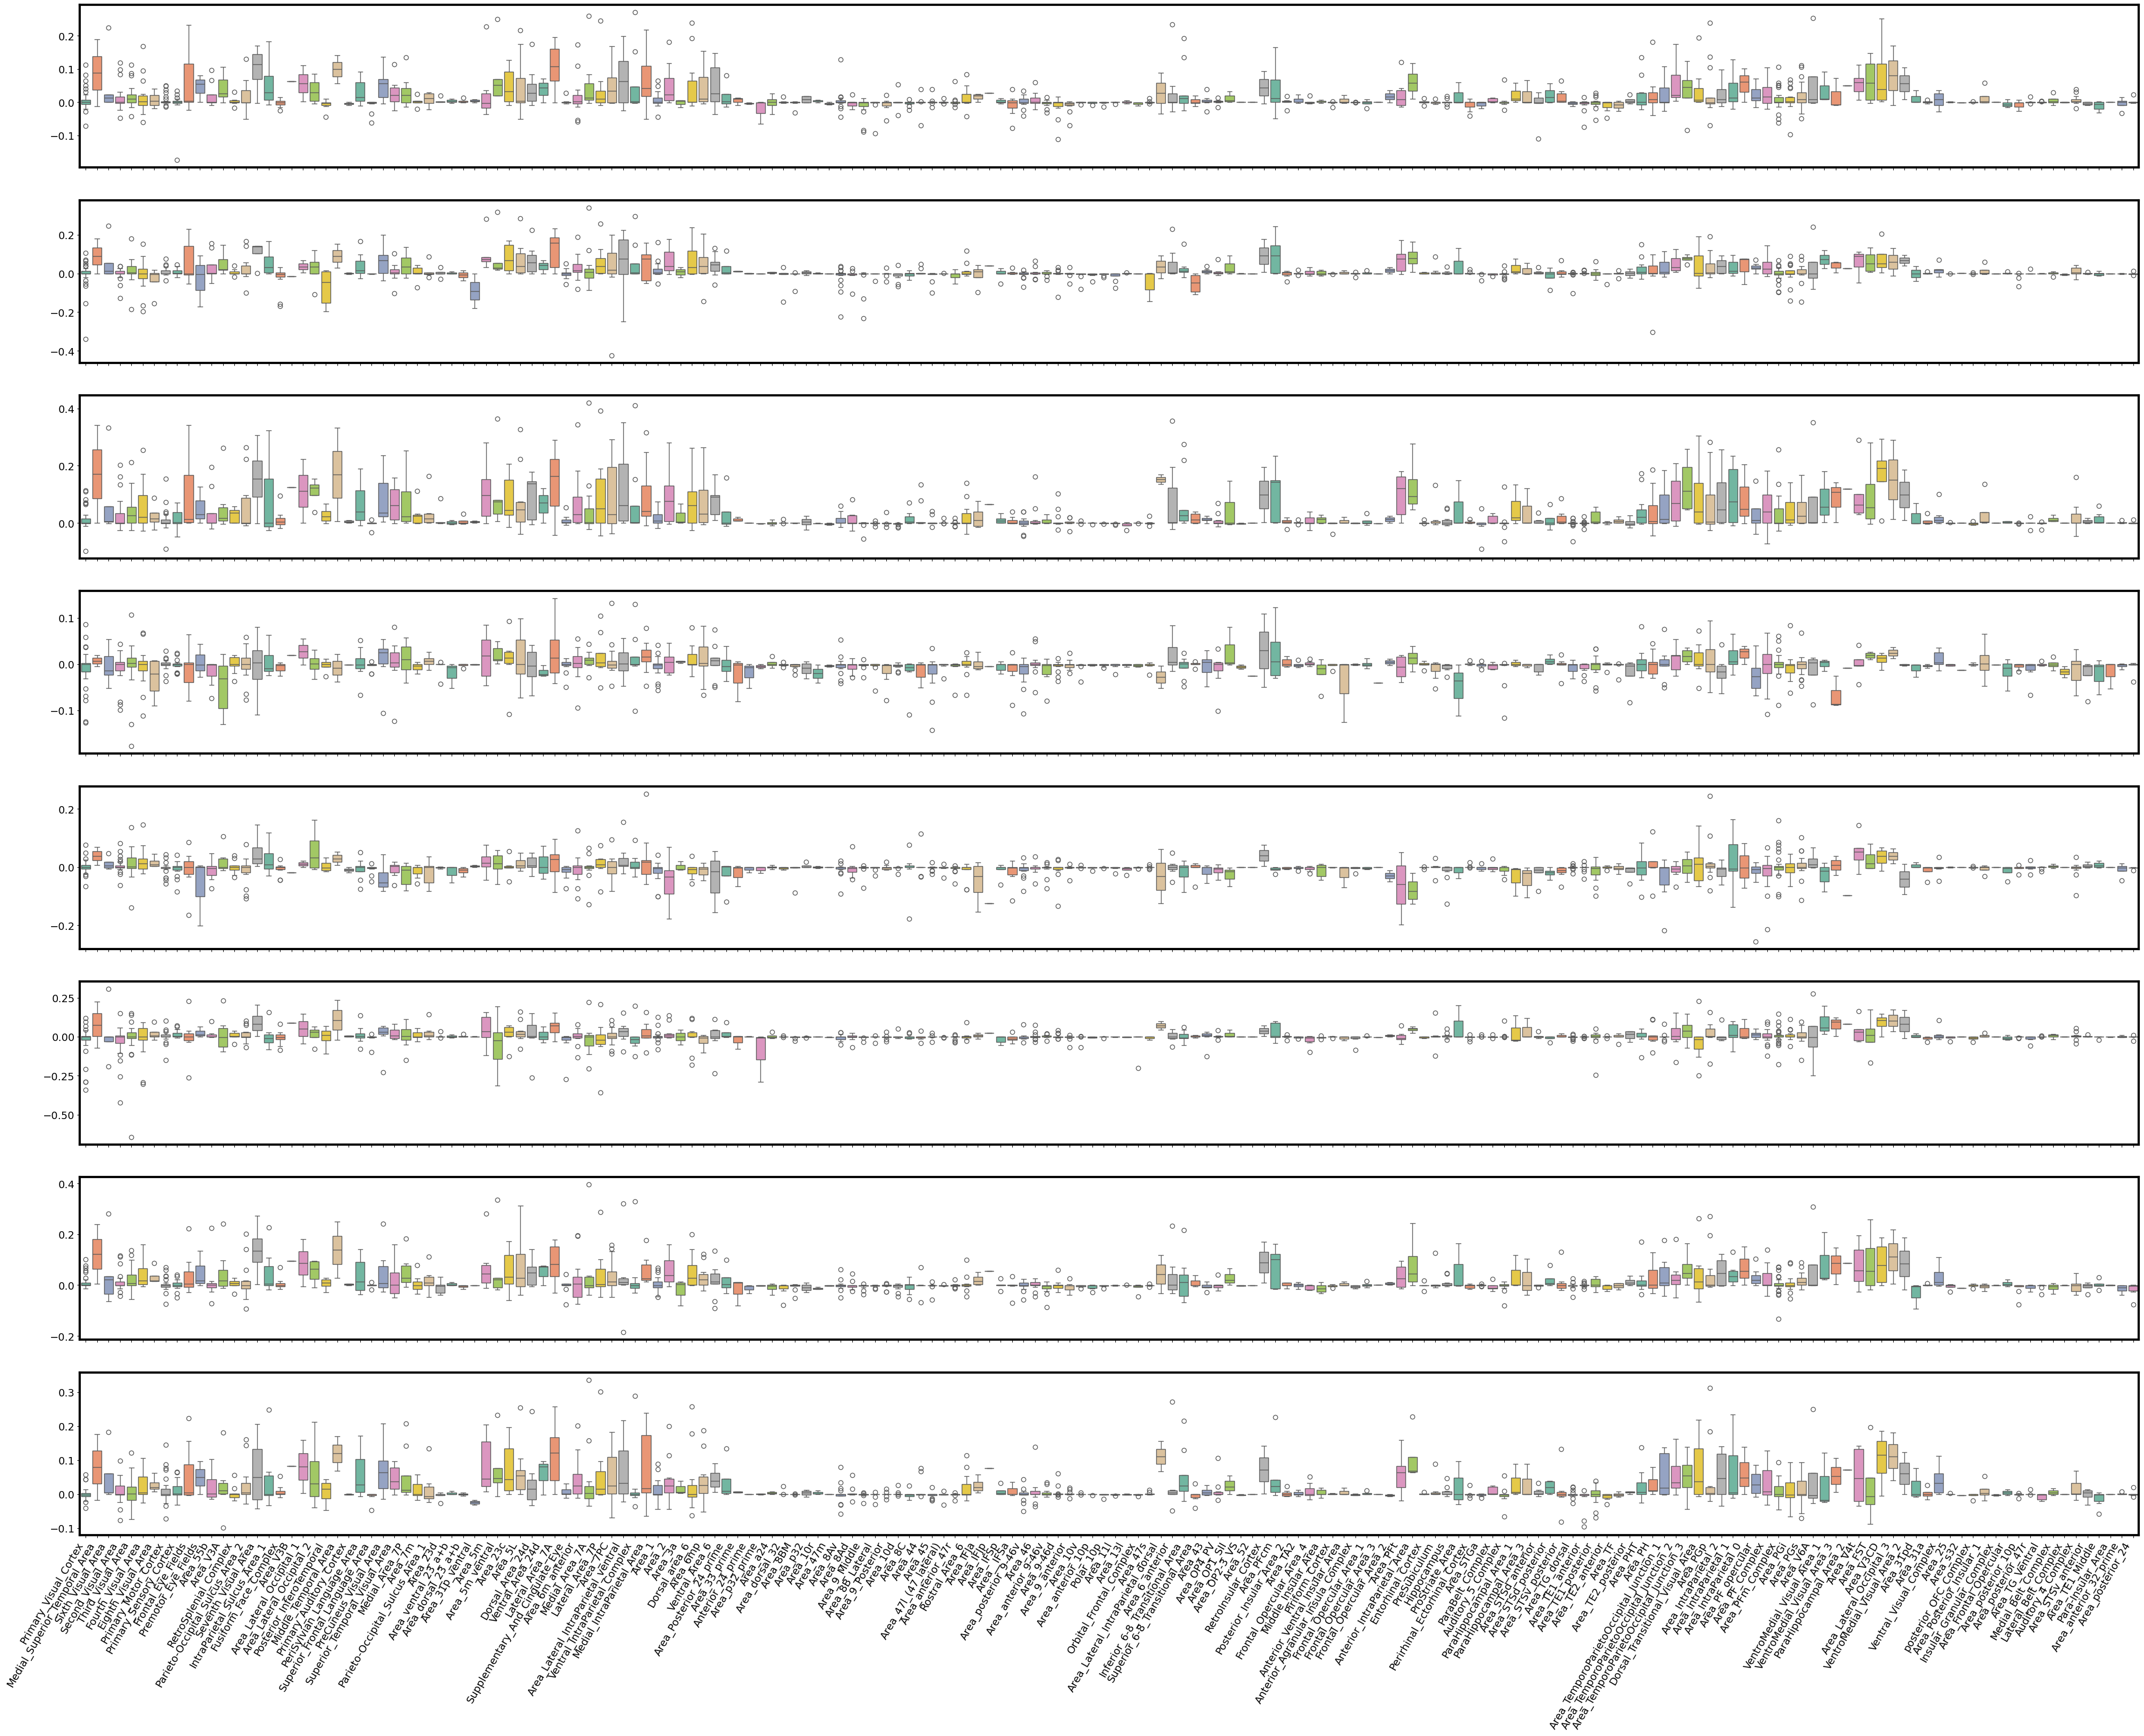

In [24]:
temp_plot_score_regions_array = copy.deepcopy(score_subs_array)
print('score shape:',temp_plot_score_regions_array.shape)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

fig, axes = plt.subplots(nrows=temp_plot_score_regions_array.shape[0], ncols=1, figsize=(50, 60))
# fig.suptitle("Scores on test data", fontsize=18)
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2
# plt.xlabel('Brain regions', fontsize=24)
# plt.ylabel('Scores', fontsize=16)

for i, ax in zip(range(temp_plot_score_regions_array.shape[0]), axes.flat):
    temp_plot_score_regions_list = []
    dim_accumulation = 0
    for i_region in range(0, len(brain_region_name_list)):
        dim_features = region_voxels_array[i_region]
        current_region_scores = temp_plot_score_regions_array[i, dim_accumulation:dim_accumulation + dim_features]
        dim_accumulation = dim_accumulation + dim_features
        # current_region_scores[current_region_scores < -0.05] = -0.05
        temp_plot_score_regions_list.append(current_region_scores)
        
    boxplt = sns.boxplot(data=temp_plot_score_regions_list, palette="Set2", ax=ax)
    boxplt.set_xticklabels([])
ax.set_xticklabels(brain_region_name_list)
plt.xticks(rotation=60, ha='right')
plt.subplots_adjust(bottom=0.4)
plt.show()

# fig.savefig('img/'+'semgeo_whole_brain_regions_test_glm_score.png', format='png', dpi=500)


#### explainable variance of each dim

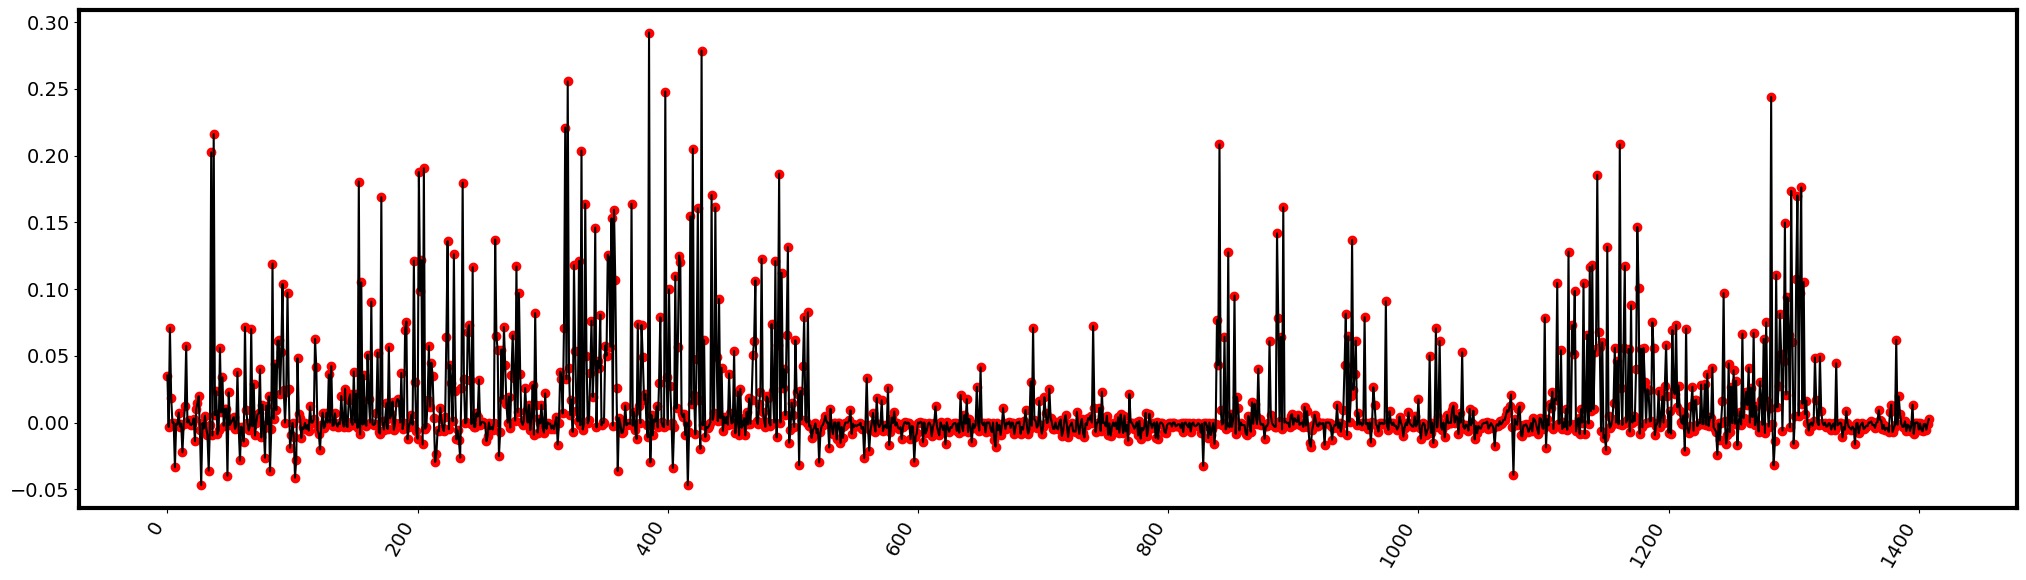

In [25]:
from sklearn.metrics import r2_score

# ve for each brain regions
dim_accumulation = 0
sub_score = np.zeros((Y_test_pred_roadtypes.shape[2],), dtype=float)

for i_dim in range(0, Y_test_pred_roadtypes.shape[2]):

    error = 0
    var = 0
    for i_test_run in np.arange(num_towns):

        Y_test = Y_test_orig_list[i_test_run]
        Y_test_predicted = Y_test_pred_list[i_test_run]

        y_true = Y_test[:, i_dim:i_dim + 1]
        y_pred = Y_test_predicted[:, i_dim:i_dim + 1]
        
        # error = error + ((y_true - y_pred) ** 2.0).sum()
        # var = var + ((y_true - y_true.mean(0)) ** 2.0).sum()

        error = error + (np.var(y_true - y_pred) ).sum()
        var = var + (np.var(y_true - y_true.mean(0)) ).sum()

    # dim_accumulation = dim_accumulation + dim_features

    sub_score[i_dim] = 1.0 - error / var
    
# show summary ev runs
explained_variance_single_dim_roadtypes = copy.deepcopy(np.asarray(sub_score))

plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 3
fig = plt.figure(figsize =(25, 6))
plt.plot(np.arange(0,Y_test_pred_roadtypes.shape[2]), explained_variance_single_dim_roadtypes,'ro')
plt.plot(np.arange(0,Y_test_pred_roadtypes.shape[2]), explained_variance_single_dim_roadtypes,'k-')
# plt.xticks(np.arange(0,len(brain_region_name_list)), brain_region_name_list, rotation='vertical', fontsize=8)
plt.xticks(rotation=60, ha='right')
# plt.margins(0.01)
plt.subplots_adjust(bottom=0.05)
plt.show()
# fig.savefig('img/'+'shared_ae-whole_brain_regions_glm_score.eps', format='eps', dpi=900)
# fig.savefig('img/'+'semgeo_shared_ae-whole_brain_regions_glm_score.png', dpi=500)


#### explainable variance of each region

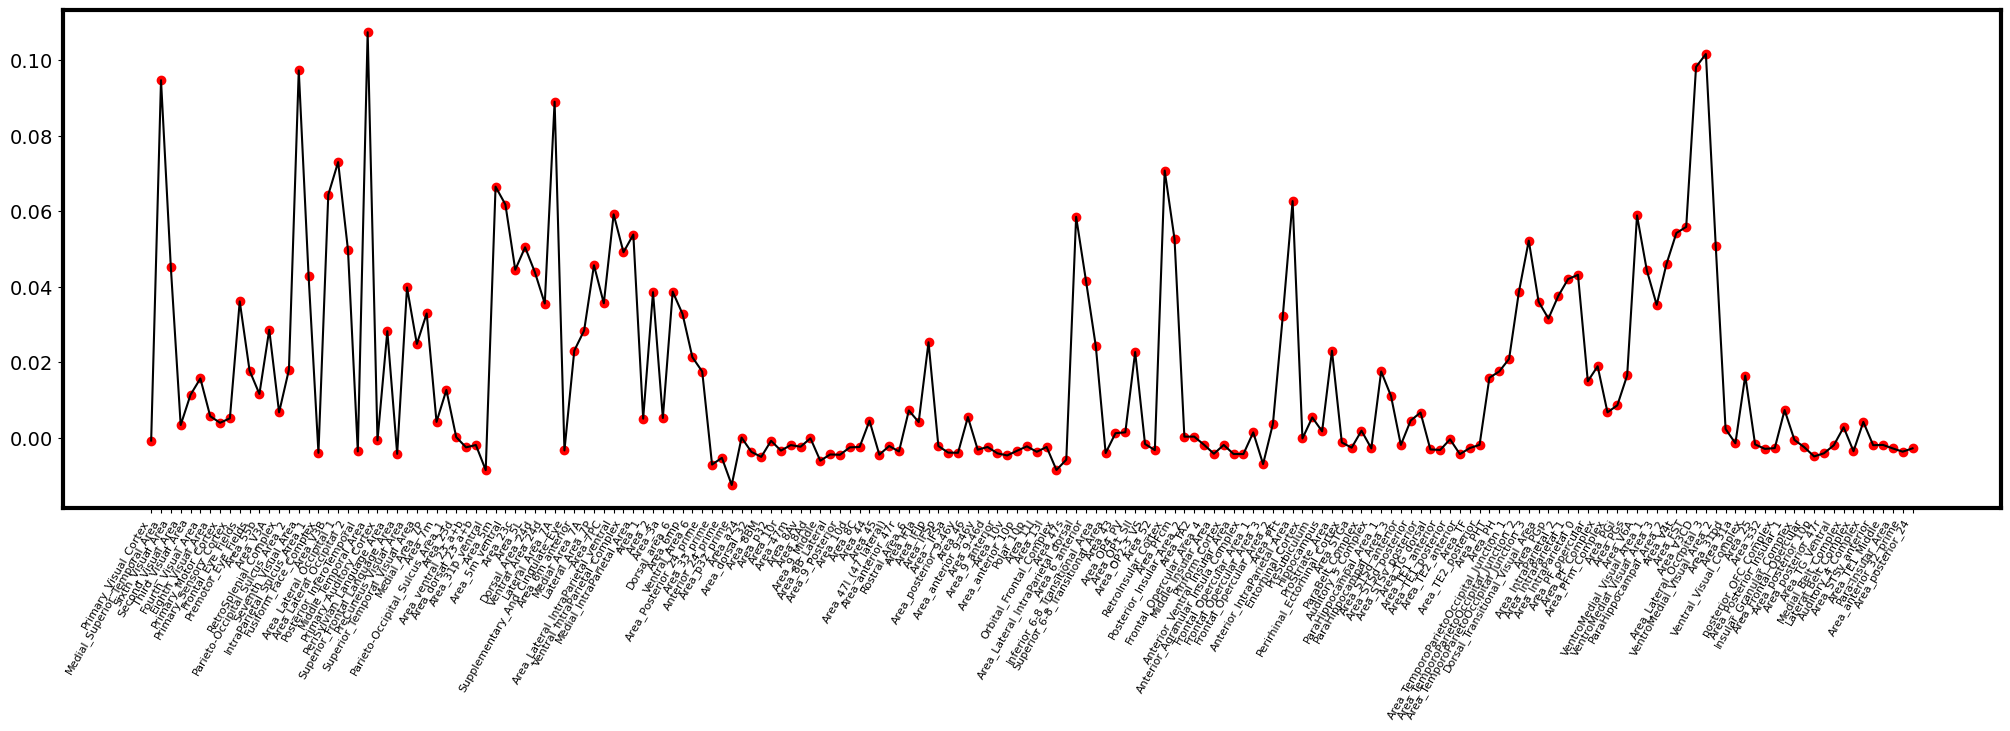

In [26]:
from sklearn.metrics import r2_score

# ve for each brain regions
dim_accumulation = 0
sub_score = np.zeros((len(brain_region_name_list),), dtype=float)

for i_region in range(0, len(brain_region_name_list)):
    dim_features = region_voxels_array[i_region]

    error = 0
    var = 0
    for i_test_run in np.arange(num_towns):

        Y_test = Y_test_orig_list[i_test_run]
        Y_test_predicted = Y_test_pred_list[i_test_run]

        y_true = Y_test[:, dim_accumulation:dim_accumulation + dim_features]
        y_pred = Y_test_predicted[:, dim_accumulation:dim_accumulation + dim_features]
        
        # error = error + ((y_true - y_pred) ** 2.0).sum()
        # var = var + ((y_true - y_true.mean(0)) ** 2.0).sum()

        error = error + (np.var(y_true - y_pred) ).sum()
        var = var + (np.var(y_true - y_true.mean(0)) ).sum()

    dim_accumulation = dim_accumulation + dim_features

    # each_sub_score[i_region] = r2_score(y_true, y_pred)
    # error = ((y_true - y_pred) ** 2.0).sum()
    # var = ((y_true - y_true.mean(0)) ** 2.0).sum()
    sub_score[i_region] = 1.0 - error / var
    
# show summary ev runs
explained_variance_roadtypes = copy.deepcopy(np.asarray(sub_score))

plt.rcParams['font.size'] = 14
plt.rcParams['axes.linewidth'] = 3
fig = plt.figure(figsize =(25, 6))
plt.plot(np.arange(0,len(brain_region_name_list)), explained_variance_roadtypes,'ro')
plt.plot(np.arange(0,len(brain_region_name_list)), explained_variance_roadtypes,'k-')
plt.xticks(np.arange(0,len(brain_region_name_list)), brain_region_name_list, rotation='vertical', fontsize=8)
plt.xticks(rotation=60, ha='right')
# plt.margins(0.01)
plt.subplots_adjust(bottom=0.05)
plt.show()
# fig.savefig('img/'+'shared_ae-whole_brain_regions_glm_score.eps', format='eps', dpi=900)
# fig.savefig('img/'+'semgeo_shared_ae-whole_brain_regions_glm_score.png', dpi=500)


## explainable variance comparison between geometry and roadtypes


### manually select brain regions according to three geometry pathways

name of areas and corresponding ID
1. name
early visual (V1, V2, V3),
higher visual (V4, V3A, V3B, V3CD, V6, V6A, V7, DVT, POS1, POS2, V8),
area 7 (7m, 7Pm, 7Am, 7PL, 7AL, 7PC)
IP area (IPS1, IP0, IP1, IP2, MIP, VIP, AIP, LIPv, LIPd)
precentral gyrus (PGs, PGp)
MT+ (LO1, LO2, LO3, V4t, MT, MST, FST)
medial (TPOJ1, TPOJ2, TPOJ3, STV, PSL, PF, PFt, PFcm, RI)
ventral (VMV1, VMV2, VMV3, VVC, ProS, PHA1, PHA2, PHA3, PresS, H)

2. ID
early visual (1, 4, 5),
higher visual (6, 13, 19, 158, 3, 152, 16, 142, 211, 15, 7),
area 7 (30, 29, 45, 46, 222, 227)
IP area (17, 146, 145, 144, 230, 229, 297, 48, 95)
precentral gyrus (151, 143)
MT+ (200, 201, 339, 156, 203, 2, 157)
medial (319, 320, 321, 28, 205, 148, 296, 105, 284)
ventral (333, 340, 334, 343, 121, 126, 155, 307, 119, 120)

3. merge
brain_region_name_early_visual = [V1, V2, V3]
brain_region_id_early_visual = [1, 4, 5]

brain_region_name_higher_visual = [V4, V3A, V3B, V3CD, V6, V6A, V7, DVT, POS1, POS2, V8]
brain_region_id_higher_visual = [6, 13, 19, 158, 3, 152, 16, 142, 211, 15, 7]

brain_region_name_area_7 = [7m, 7Pm, 7Am, 7PL, 7AL, 7PC]
brain_region_id_area_7 = [30, 29, 45, 46, 222, 227]

brain_region_name_IP_area = [IPS1, IP0, IP1, IP2, MIP, VIP, AIP, LIPv, LIPd]
brain_region_id_IP_area = [17, 146, 145, 144, 230, 229, 297, 48, 95]

brain_region_name_precentral_gyrus = [PGs, PGp]
brain_region_id_precentral_gyrus = [151, 143]

brain_region_name_MT_plus = [LO1, LO2, LO3, V4t, MT, MST, FST]
brain_region_id_MT_plus = [200, 201, 339, 156, 203, 2, 157]

brain_region_name_medial_visual = [TPOJ1, TPOJ2, TPOJ3, STV, PSL, PF, PFt, PFcm, RI]
brain_region_id_medial_visual = [319, 320, 321, 28, 205, 148, 296, 105, 284]

brain_region_name_ventral_visual = [VMV1, VMV2, VMV3, VVC, ProS, PHA1, PHA2, PHA3, PresS, H]
brain_region_id_ventral_visual = [333, 340, 334, 343, 121, 126, 155, 307, 119, 120]



In [27]:
# Lists of brain region names and IDs
brain_region_name_early_visual = ['V1', 'V2', 'V3']
brain_region_id_early_visual = [1, 4, 5]

brain_region_name_higher_visual = ['V4', 'V3A', 'V3B', 'V3CD', 'V6', 'V6A', 'V7', 'DVT', 'POS1', 'POS2', 'V8']
brain_region_id_higher_visual = [6, 13, 19, 158, 3, 152, 16, 142, 31, 15, 7]

brain_region_name_area_7 = ['7m', '7Pm', '7Am', '7PL', '7AL', '7PC']
brain_region_id_area_7 = [30, 29, 45, 46, 42, 47]

brain_region_name_IP_area = ['IPS1', 'IP0', 'IP1', 'IP2', 'MIP', 'VIP', 'AIP', 'LIPv', 'LIPd']
brain_region_id_IP_area = [17, 146, 145, 144, 50, 49, 117, 48, 95]

brain_region_name_precentral_gyrus = ['PGs', 'PGp']
brain_region_id_precentral_gyrus = [151, 143]

brain_region_name_MT_plus = ['LO1', 'LO2', 'LO3', 'V4t', 'MT', 'MST', 'FST']
brain_region_id_MT_plus = [20, 21, 159, 156, 23, 2, 157]

brain_region_name_medial_visual = ['TPOJ1', 'TPOJ2', 'TPOJ3', 'STV', 'PSL', 'PF', 'PFt', 'PFcm', 'RI']
brain_region_id_medial_visual = [139, 140, 141, 28, 25, 148, 116, 105, 104]

brain_region_name_ventral_visual = ['VMV1', 'VMV2', 'VMV3', 'VVC', 'ProS', 'PHA1', 'PHA2', 'PHA3', 'PresS', 'H']
brain_region_id_ventral_visual = [153, 160, 154, 163, 121, 126, 155, 127, 119, 120]

selected_brain_region_name_list = (
    brain_region_name_early_visual +
    brain_region_name_higher_visual +
    brain_region_name_area_7 +
    brain_region_name_IP_area +
    brain_region_name_precentral_gyrus +
    brain_region_name_MT_plus +
    brain_region_name_medial_visual +
    brain_region_name_ventral_visual
)
selected_brain_region_id_list = (
    brain_region_id_early_visual +
    brain_region_id_higher_visual +
    brain_region_id_area_7 +
    brain_region_id_IP_area +
    brain_region_id_precentral_gyrus +
    brain_region_id_MT_plus +
    brain_region_id_medial_visual +
    brain_region_id_ventral_visual
)

### comparison between depth and roadtypes

#### load explainbale variance of depth

In [28]:
from scipy.io import loadmat

matdic = loadmat("processed_data/depth_explainable_variance_brain_regions.mat")
depth_explainable_variance_brain_regions = np.squeeze(matdic["explained_variance_midlayer_geometry"])

print("depth_explainable_variance_brain_regions max value:", np.max(depth_explainable_variance_brain_regions))


depth_explainable_variance_brain_regions max value: 0.05083378849080111


#### load explainbale variance of roadtypes

In [29]:
from scipy.io import loadmat

matdic = loadmat("processed_data/roadtypes_explainable_variance_brain_regions.mat")
roadtypes_explainable_variance_brain_regions = np.squeeze(matdic["explained_variance_roadtypes"])

print("roadtypes_explainable_variance_brain_regions max value:", np.max(roadtypes_explainable_variance_brain_regions))

roadtypes_explainable_variance_brain_regions max value: 0.10551893716742489


### plot

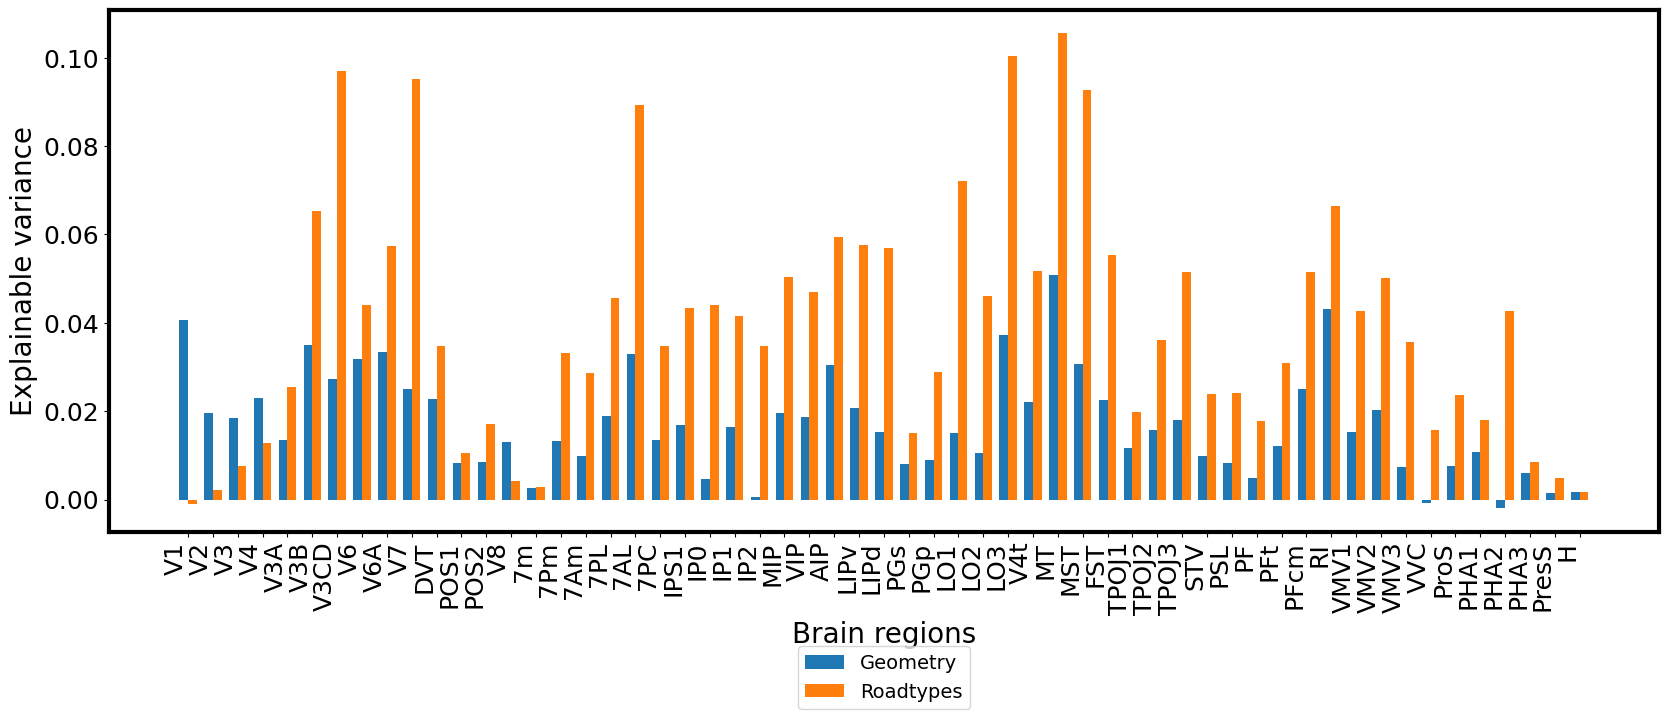

In [30]:
import numpy as np
import copy 
import matplotlib.pyplot as plt

# plt.rcParams['font.family'] = 'Times New Roman'

# Sample data
categories = selected_brain_region_name_list

shifted_selected_brain_region_id_list = [x - 1 for x in selected_brain_region_id_list]

group1_values = copy.deepcopy(depth_explainable_variance_brain_regions)
group1_values = group1_values[shifted_selected_brain_region_id_list]

group2_values = copy.deepcopy(roadtypes_explainable_variance_brain_regions)
group2_values = group2_values[shifted_selected_brain_region_id_list]

# Calculate the width for each group
bar_width = 0.35

# Create an array of indices for the x-axis ticks
x = np.arange(len(categories))

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(20,9))

# Plot the bars for Group 1
ax.bar(x - bar_width/2, group1_values, bar_width, label='Geometry')

# Plot the bars for Group 2
ax.bar(x + bar_width/2, group2_values, bar_width, label='Roadtypes')

# Set labels, title, and legend
ax.set_xlabel('Brain regions', fontsize=20)
ax.set_ylabel('Explainable variance', fontsize=20)
# ax.set_title('Grouped Bar Chart')

ax.tick_params(axis='y', labelsize=18)
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=90, ha='right', fontsize=18)
ax.legend(bbox_to_anchor=(0.5, -0.2),loc='upper center')
plt.subplots_adjust(bottom=0.3)  # Adjust the value as needed
# plt.subplots_adjust(left=0.0, right=1.0)

# Display the plot
plt.show()
# fig.savefig('imgs/ev_comparison_bewteen_depth_and_roadtypes.svg', dpi=500)


## decoding of depth structures


### load images of rgb, groundtruth depth, and decoded depth

In [31]:
from scipy.io import loadmat

matdic = loadmat("processed_data/paired_gt_rgb_decoding_and_depth.mat")
town07_rgb_images = np.squeeze(matdic["town07_rgb_images"])
town07_groundtruth_depth_images = np.squeeze(matdic["town07_depth_images"])
town07_decoded_depth_images = np.squeeze(matdic["town07_recon_images"])
# gt_pred_pair_window1_indices = np.squeeze(matdic["gt_pred_pair_indices"])

print("town07_rgb_images shape:", town07_rgb_images.shape)
print("town07_groundtruth_depth_images shape:", town07_groundtruth_depth_images.shape)
print("town07_decoded_depth_images shape:", town07_decoded_depth_images.shape)
# print("gt_pred_pair_window1_indices shape:", gt_pred_pair_window1_indices.shape)

# gt_decoding_pair_indices = gt_pred_pair_window1_indices

town07_rgb_images shape: (200, 320, 640, 3)
town07_groundtruth_depth_images shape: (200, 320, 640)
town07_decoded_depth_images shape: (200, 320, 640)


In [32]:
from scipy.io import loadmat

matdic = loadmat("processed_data/gt_pred_pair_window50_indices.mat")
gt_pred_pair_window50_indices = np.squeeze(matdic["gt_pred_pair_window50_indices"])

print("gt_pred_pair_window50_indices shape:", gt_pred_pair_window50_indices.shape)

gt_decoding_pair_indices = gt_pred_pair_window50_indices

gt_pred_pair_window50_indices shape: (150, 150)


### display

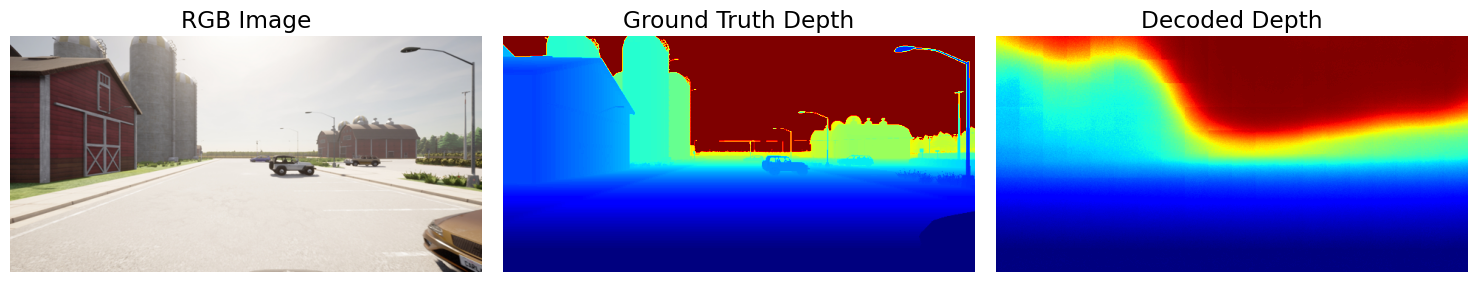

In [33]:
import matplotlib.pyplot as plt

# Select an index to display
index = 20

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display the RGB image
axes[0].imshow(town07_rgb_images[index])
axes[0].set_title('RGB Image')
axes[0].axis('off')

# Display the ground truth depth image
im1 = axes[1].imshow(town07_groundtruth_depth_images[index], cmap='jet')
axes[1].set_title('Ground Truth Depth')
axes[1].axis('off')

i_matched_index = gt_decoding_pair_indices[index][0]

# Display the decoded depth image
im2 = axes[2].imshow(town07_decoded_depth_images[i_matched_index], cmap='jet')
axes[2].set_title('Decoded Depth')
axes[2].axis('off')

# Add colorbars for the depth images
# fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
# fig.colorbar(im2, ax=axes[2], fraction=0.046, pad=0.04)

# Adjust layout
plt.tight_layout()
plt.show()

### save as videos

In [34]:
import os
import cv2
import numpy as np

# Folder to save videos
output_folder = 'output_videos'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Calculate the FPS
num_frames = gt_decoding_pair_indices.shape[0]
duration_sec = 30
fps = num_frames / duration_sec

# Define the video codec and create VideoWriter objects
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for mp4

# Video writer for RGB images
out_rgb = cv2.VideoWriter(os.path.join(output_folder, 'town07_rgb_images.mp4'), fourcc, fps, (640, 320))

# Video writer for ground truth depth images
out_gt_depth = cv2.VideoWriter(os.path.join(output_folder, 'town07_groundtruth_depth_images.mp4'), fourcc, fps, (640, 320))

# Video writer for decoded depth images
out_decoded_depth = cv2.VideoWriter(os.path.join(output_folder, 'town07_decoded_depth_images.mp4'), fourcc, fps, (640, 320))

# Write frames to the video files
for i in range(num_frames):

    i_matched_index = gt_decoding_pair_indices[i][0]
    
    # print("gt TR index:", i, "matched TR index:", i_matched_index)

    # Write RGB image frame
    rgb_frame = cv2.cvtColor(town07_rgb_images[i], cv2.COLOR_RGB2BGR)  # Convert RGB to BGR for OpenCV
    out_rgb.write(rgb_frame)
    
    # Write ground truth depth image frame
    gt_depth_frame = cv2.normalize(town07_groundtruth_depth_images[i], None, 0, 255, cv2.NORM_MINMAX)
    gt_depth_frame = np.uint8(gt_depth_frame)
    gt_depth_frame_colored = cv2.applyColorMap(gt_depth_frame, cv2.COLORMAP_JET)
    out_gt_depth.write(gt_depth_frame_colored)
    
    # Write decoded depth image frame
    decoded_depth_frame = cv2.normalize(town07_decoded_depth_images[i_matched_index], None, 0, 255, cv2.NORM_MINMAX)
    decoded_depth_frame = np.uint8(decoded_depth_frame)
    decoded_depth_frame_colored = cv2.applyColorMap(decoded_depth_frame, cv2.COLORMAP_JET)
    out_decoded_depth.write(decoded_depth_frame_colored)

# Release the video writers
out_rgb.release()
out_gt_depth.release()
out_decoded_depth.release()

print("Videos have been saved successfully.")

Videos have been saved successfully.


### combined three videos together

Combined three videos together with Video Editing Software (Davinci).
Then we get the final comparison video [comparison_rgb_decoded_gt.mp4](startup/output_videos/comparison_rgb_decoded_gt.mp4) here.